# Tarea 2 - Ignacio Vargas Cordero

Como siempre, documenten **todo** lo que hacen en el notebook

Se recomienda que *colaboren* (equipos de máximo dos personas) en la tarea.

## 1. Histogramas

Usando la función `randn`, generen $N$ valores tipo `Float64` al azar ($N\sim 10000$, o mayor, es razonable). Construyan la función `histograma`, que regresa un vector de tamaño $n_{hist}$ (que es un argumento de la función) y que contiene el histograma de frecuencias *sin normalizar*. Esto es, la primer componente del vector corresponde al número de valores generados al azar que caen en el intervalo (llamado *bin* en inglés) $[x_0, x_1)$, los de la segunda componente caen en el intervalo $[x_1, x_2)$, etc, hasta $[x_{n_{hist}-1}, x{n_{hist}})$, donde el tamaño de los intervalos es el mismo y corresponde a $\Delta x = (\textrm{sup}(x)-\textrm{inf}(x))/n_{hist}$. (No escatimen en estética.)

Dibujen el histograma a partir de sus datos.

PyPlot (matplotlib) de hecho tiene [una función]() útil para dibujar histogramas a partir de los datos directamente. Utilizando esa función, muestren el histograma de sus datos. Debería ser muy parecida a la que ya obtuvieron antes.

NOTA: Hay esencialmente dos formas de hacerlo, que se distinguen por el número de veces que uno lee los datos. Traten de hacer su implementación usando *una* lectura de los datos. (Si no pueden, llevarán sobre sus hombros esa carga toda su vida.)

In [54]:
#randn
#generar 10000 valores random que sean Float64 
#construir funcion histograma
#esta debe regresar vector tamano NHist (argumento de funcion histograma)
#vector NHist contiene frecuencias sin normalizar 
#primer componente vector corresponde a numero valores generados random que caen en intervalo (bin) [x0,x1)
#segunda componente caen en [x1,x2) etc hasta [xnhist-1,xnhist) donde tamano de los dos intervalos es el mismo
#tamano intervalos corresponde a delta_x=(sup(x)-inf(x)/nhist)

#dibujar histograma 
#dibujar con PyPlot(matplotlib) de los datos directamente

using PyPlot

"""
`histograma(Arreglo, NHist)` es una funcion que obtiene un histograma de frecuencias no normalizadas 
del arreglo que se le proporcione (Float64).

Por la definicion de los intervalos de longitud, es necesario que 0 < NHist ≦ Arreglo_Long para que no se indetermine.
El arreglo no puede ser vacio.

La funcion devuelve el indice y vector resultado, quien es de las mismas dimensiones que NHist.
Cada entrada tiene el número de valores encontrados en el intervalo [x_{i-1},x_i].
"""

#Se pide al usuario que ingrese un arreglo de Float64 y un argumento de la funcion NHist. Si no provee este ultimo,
#se le asigna un valor predeterminado de 100.
function histograma(Arreglo::Array{Float64,1}, NHist=100)
    
    Arreglo_Long = length(Arreglo)
    
    #Se declaran reglas para que el programa funcione. Si las cumple, ordenamos los elementos aleatorios de 'Arreglo'.
    Arreglo_Long == 0 ? error("Arreglo vacio. Revisar documentacion") : 
    (NHist <= 0 || Arreglo_Long < NHist) ? error("Argumento NHist es invalido. Revisar documentacion") : 
    Arreglo_Orden = sort(Arreglo)
    
    #Se declara el tamano de los intervalos
    delta_x= (Arreglo_Orden[end] - Arreglo_Orden[1])/NHist
    
    #Se inicializa el Arreglo donde saldran los resultados, con las mismas dimensiones del NHist escogido
    vector_resultado = zeros(NHist)
    
    #Se inicia ciclo for para declarar 'x_i', el contador 'incremento', y 'ultimo' - quien redondea la suma del rango
    #de elementos de 'vector_resultado' llevados hasta el momento del ciclo + 1. Al pasar por el ciclo interno,
    #nos asigna el valor de incremento en cada elemento de vector_resultado.
    for i in 1:NHist
        
        x_i = i*delta_x + Arreglo_Orden[1]
        incremento = 0
        ultimo = round(Int64, sum(vector_resultado[1:i]) + 1)
        
        #Ciclo interno para continuar hasta que el elemento de Arreglo_Orden sea igual a x_i
        for j in ultimo:Arreglo_Long
            finalcuenta = Arreglo_Orden[j]
            finalcuenta < x_i ? incremento += 1 : break
            
        end
        
        vector_resultado[i] = incremento
        
    end
    
    #Le sumamos 1 al ultimo elemento de vector_resultado. Devolvemos al indice y vector_resultado.
    vector_resultado[end] += 1
    indice = collect(1:NHist)
    indice, vector_resultado
    
end

histograma (generic function with 2 methods)

In [55]:
? histograma

search: 

`histograma(Arreglo, NHist)` es una funcion que obtiene un histograma de frecuencias no normalizadas  del arreglo que se le proporcione (Float64).

Por la definicion de los intervalos de longitud, es necesario que 0 < NHist ≦ Arreglo_Long para que no se indetermine. El arreglo no puede ser vacio.

La funcion devuelve el indice y vector resultado, quien es de las mismas dimensiones que NHist. Cada entrada tiene el número de valores encontrados en el intervalo [x_{i-1},x_i].


histograma



In [57]:
#inicializamos nuestro arreglo aleatorio, guardamos los resultados del histograma de dicho arreglo aleatorio en las
#variables 'indice_afuera' y 'vector_resultado_afuera'
Arreglo_Aleatorio = randn(10000);
indice_afuera, vector_resultado_afuera = histograma(Arreglo_Aleatorio);

In [59]:
sort(Arreglo_Aleatorio)

10000-element Array{Float64,1}:
 -4.18976
 -4.18975
 -3.50741
 -3.43779
 -3.32164
 -3.29997
 -3.29492
 -3.26783
 -3.2585 
 -3.17135
 -3.15297
 -3.13454
 -3.07267
  ⋮      
  3.13085
  3.13901
  3.20268
  3.22271
  3.2242 
  3.27674
  3.31319
  3.33306
  3.42132
  3.50037
  3.52865
  3.66411

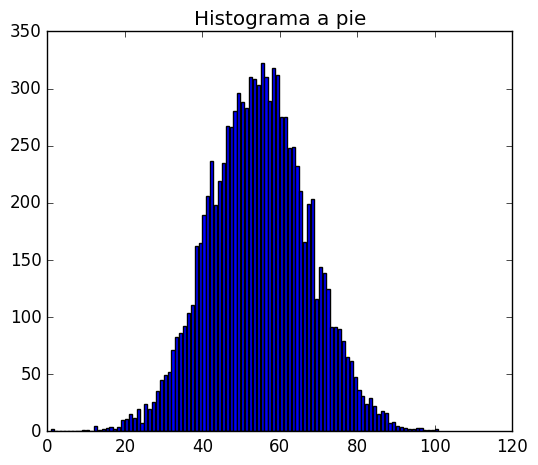

PyObject <matplotlib.text.Text object at 0x7f213f9eaef0>

In [60]:
figure(figsize=(6,5))
bar(indice_afuera,vector_resultado_afuera)
title("Histograma a pie")

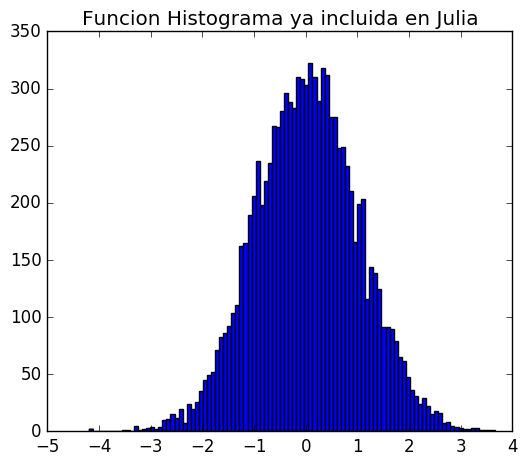

In [61]:
figure(figsize = (6,5))
plt[:hist](Arreglo_Aleatorio,100)
title("Funcion Histograma ya incluida en Julia")
show()

## 2. Promedio y varianza

(a) Siguiendo con la generación de datos del ejercicio anterior, hagan una subrutina que calcule el promedio y la varianza de los datos generados anteriormente. Comparen su resultado con lo que se obtiene al utilizar `mean` y `var` (que son las funciones nativas de julia que hacen eso).

In [63]:
function promedio(A::Array)
    
    suma = 0.0
    for j in A  #Ciclo for corriendo sobre los elementos del arreglo aleatorio y los va sumando
        suma+=j
    end 
    suma/length(A)
    
end

promedio (generic function with 1 method)

In [65]:
function varianza(B::Array)
    
    suma = 0.0
    for j in B  #Ciclo for corriendo sobre los elementos del arreglo aleatorio y los va sumando
        suma+=(promedio(B)-j)^2
    end 
    return suma/length(B)
    
end

varianza (generic function with 1 method)

In [124]:
abs(mean(Arreglo_Aleatorio)-promedio(Arreglo_Aleatorio)) , 
abs(var(Arreglo_Aleatorio)-varianza(Arreglo_Aleatorio))

#Como se puede ver en los resultados, la diferencia entre mean y promedio es muy baja. Sin embargo, la difrencia entre
#var y varianza es bastante notable - esto se debe a que varianza llama a promedio en cada corrida del ciclo for.

(2.7755575615628914e-17,0.00010023264535607979)

In [113]:
@time promedio(Arreglo_Aleatorio);
@time mean(Arreglo_Aleatorio);

  0.000044 seconds (5 allocations: 176 bytes)
  0.000041 seconds (5 allocations: 176 bytes)


In [116]:
@time varianza(Arreglo_Aleatorio)
@time var(Arreglo_Aleatorio);

  0.172771 seconds (5 allocations: 176 bytes)
  0.000027 seconds (8 allocations: 288 bytes)


(b) Existe un [algoritmo recursivo](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm), ampliamente desconocido, que permite calcular el promedio y la varianza con una sóla lectura de los datos. Impleméntenlo. La *misma* función debería de darles *ambos* valores.


In [151]:
function algoritmo_recursivo(C::Array)
    n = 0
    mean = 0.0
    Arreglo_Aleatorio_2 = 0.0
     
    for x in C
        n += 1
        delta = x - mean
        mean += delta/n
        Arreglo_Aleatorio_2 += delta*(x - mean)
    end
    
    n < 2 ? [NaN,NaN] : [mean, Arreglo_Aleatorio_2 / n]
end

algoritmo_recursivo (generic function with 1 method)

In [152]:
abs(promedio(Arreglo_Aleatorio)-unalectura(Arreglo_Aleatorio)[1]), 
abs(varianza(Arreglo_Aleatorio)-unalectura(Arreglo_Aleatorio)[2])
#Diferencia pequena en ambos casos, pero la de varianza es 2 ordenes de magnitud mayor

(6.591949208711867e-17,1.1102230246251565e-15)

In [156]:
@time promedio(Arreglo_Aleatorio);
@time varianza(Arreglo_Aleatorio);
@time algoritmo_recursivo(Arreglo_Aleatorio);
#Es mucho mas rapido unalectura al hacer ambas cosas, debe realizar menos iteraciones.

  0.000023 seconds (5 allocations: 176 bytes)
  

2-element Array{Float64,1}:
 0.0236118
 1.00223  

0.130069 seconds (5 allocations: 176 bytes)
  0.000104 seconds (7 allocations: 272 bytes)


(c) ¿Cuál de todos los algoritmos es el más rápido? Consideren esto para datos de distinta longitud, cubriendo varios órdenes de magnitud.

In [195]:
#Generamos 3 arreglos aleatorios de diferentes dimensiones
R1=rand(10); 
R2=rand(10^3);
R3=rand(10^5);

In [192]:
@time promedio(R1);
@time varianza(R1);
@time algoritmo_recursivo(R1);
println("# # # # # # # # # # # # # # # # # # # # # # #")
@time promedio(R2);
@time varianza(R2);
@time algoritmo_recursivo(R2);
println("# # # # # # # # # # # # # # # # # # # # # # #")
@time promedio(R3);
@time varianza(R3);
@time algoritmo_recursivo(R3);

#Es claro por los resultados que el algoritmo mas rapido es el recursivo.

  0.000006 seconds (5 allocations: 176 bytes)
  0.000005 seconds (5 allocations: 176 bytes)
  0.000005 seconds (7 allocations: 272 bytes)
# # # # # # # # # # # # # # # # # # # # # # #
  0.000007 seconds (5 allocations: 176 bytes)
  0.002106 seconds (5 allocations: 176 bytes)
  0.000021 seconds (7 allocations: 272 bytes)
# # # # # # # # # # # # # # # # # # # # # # #
  0.000193 seconds (5 allocations: 176 bytes)
  

2-element Array{Float64,1}:
 0.500293 
 0.0828991

9.847420 seconds (5 allocations: 176 bytes)
  0.001025 seconds (7 allocations: 272 bytes)


## 3. Método de Simpson para integrar $f(x)$ en un intervalo

Implementen el método de Simpson para integrar una función arbitraria $f(x)$.

In [205]:
#Guiandonos por el ejemplo de implementacion del Metodo de Simpson para Python encontrado en la pagina de Wikipedia de
#Simpson's Rule":

function metodo_simpson(f,a,b,n)
    
    n == 0 ? error("'n' no puede ser cero."): integral = 0.0
    
    delta = abs(b-a)/n
    xs = [a + delta*m for m in 0:n]
    
    simpson(f,a,b) = ((b-a)/6) * ( f(a) + 4*f((a+b)/2) + f(b) )
    
    for i in 1:n
        integral += simpson(f,xs[i],xs[i+1])
    end
    
    return integral
end

metodo_simpson (generic function with 1 method)

In [222]:
f(x) = x^2
metodo_simpson(f,0,1,100)

0.3333333333333333

In [223]:
g(x) = sin(x)
metodo_simpson(g,0,pi,100)

2.0000000006764718

In [215]:
a = 2
b = 5
c = 10

2/4*(5^4 -  2^4), 
metodo_simpson(x -> 2*x^3, a, b, c)

(304.5,304.5)